In [1]:
# Librerias necesarias
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import numpy as np
import heapq

# Constantes quimicas. Peso de cada elemento
M_H = 1.01
M_C = 12.01
M_N = 14.05
M_O = 15.99

# Funciones para determinar el coeficiente del coseno y centroides
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def centroid(cluster):
    return np.mean(cluster, axis=0)

In [2]:
# Datos originales
original_data = {
    "Amoniaco": {"H": 3, "N": 1, "C": 0, "O": 0, "K_b": 1.8e-05},
    "Anilina": {"H": 7, "N": 1, "C": 6, "O": 0, "K_b": 4.3e-10},
    "Dimetilamina": {"H": 7, "N": 1, "C": 2, "O": 0, "K_b": 5.4e-4},
    "Etilamina": {"H": 7, "N": 1, "C": 2, "O": 0, "K_b": 6.4e-4},
    "Hidracina": {"H": 4, "N": 2, "C": 0, "O": 0, "K_b": 1.3e-6},
    "Hidroxilamina": {"H": 3, "N": 1, "C": 0, "O": 1, "K_b": 1.1e-08},
    "Metilamina": {"H": 5, "N": 1, "C": 1, "O": 0, "K_b": 4.4e-4},
    "Piridina": {"H": 5, "N": 1, "C": 5, "O": 0, "K_b": 1.7e-09},
    "Trimetilamina": {"H": 9, "N": 1, "C": 3, "O": 0, "K_b": 6.4e-05},
}

# Limpieza, codificación y estadanrización de datos
codifing = dict()
data_list = []
for compuesto  in original_data:
    el = original_data[compuesto]
    peso = M_H * el["H"] + M_N * el["N"] + M_C * el["C"] + M_O * el["O"]
    info = [
        el["K_b"], M_C*el["C"] / peso, M_H*el["H"] / peso, M_O*el["O"] / peso, M_N*el["N"] / peso, peso, compuesto
    ]
    data_list.append(info)

min_t = [data_list[0][i] for i in range(len(data_list[0])-1)]
max_t = [data_list[0][i] for i in range(len(data_list[0])-1)]
for i in range(len(data_list[1])-1):
    for j in range(len(data_list)):
        min_t[i] = min(min_t[i], data_list[j][i])
        max_t[i] = max(max_t[i],data_list[j][i])
for i in range(len(min_t)):
    for j in range(len(data_list)):
        data_list[j][i] = (data_list[j][i] - min_t[i])/(max_t[i]-min_t[i])

data_list.sort(key=lambda x: x[0])
data_list_2 = []
for i in range(len(data_list)):
    codifing[tuple(data_list[i][:-1])] = [data_list[i][-1], i]
    data_list_2.append(data_list[i][:-1])

data = np.array(data_list_2)

In [3]:
# Generar la matriz Z descrita en scipy.cluster.hierarchy.linkage
def Matrix_Z(data):
    clusters = []
    for i in range(data.shape[0]):
        clusters.append([data[i]])
    vis = [False] * len(2*clusters)
    Z = []
    heap = []
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            sim = cosine_similarity(data[i], data[j])
            heapq.heappush(heap, (sim, i, j))

    for it in range(len(data)-1):
        v = heapq.heappop(heap)
        while(vis[v[1]] or vis[v[2]]):
            v = heapq.heappop(heap)

        vis[v[1]] =True
        vis[v[2]] = True

        new_cluster = clusters[v[1]] + clusters[v[2]]
        index = len(clusters)
        cc = centroid(new_cluster)

        clusters.append(new_cluster)
        Z.append([v[1], v[2], v[0], len(new_cluster)])
        for i in range(len(clusters)-1):
            if not vis[i]:
                sim = cosine_similarity(cc, centroid(clusters[i]))
                heapq.heappush(heap, (sim, i, index))

    return np.array(Z)

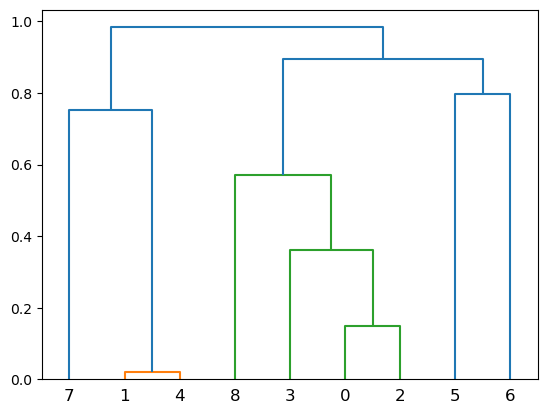

In [4]:
# Aplicar a los datos la clusterización y generar el dendograma 
Z = Matrix_Z(data)
dn = dendrogram(Z)
plt.show()